In [2]:
import pandas as pd
#pd.set_option('display.max_rows', None)

import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_excel('dati.xlsx', parse_dates=True)
df.head(30)

,Calendario,Quantita,Tipologia
0,2021-05-05,2.00,Spine
1,2021-05-21,3.25,Spine
2,2021-05-25,228.00,Spine
3,2021-05-26,181.80,Spine
4,2021-05-27,256.00,Spine
5,2021-05-28,246.00,Spine
6,2021-05-29,233.00,Spine
7,2021-05-30,209.00,Spine
8,2021-05-31,153.00,Spine
9,2021-06-01,222.00,Spine


In [4]:
copia_df=df.copy()

In [5]:
df_fritti=copia_df[copia_df['Tipologia']=='Fritti']
df_fritti=df_fritti.drop('Tipologia',axis=1)
df_fritti.head()

,Calendario,Quantita
521,2021-05-08,1.0
522,2021-05-25,41.0
523,2021-05-26,59.0
524,2021-05-27,47.0
525,2021-05-28,60.0


In [90]:
df_fritti.describe()

,Quantita
count,519.000000
mean,36.657148
std,15.923654
min,1.000000
25%,25.000000
50%,35.000000
75%,45.990000
max,112.960000


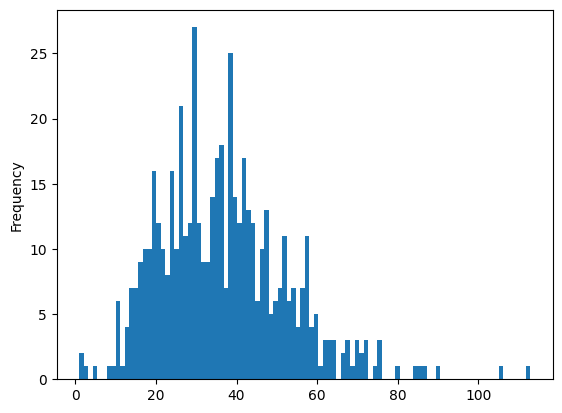

In [7]:
df_fritti['Quantita'].plot(kind='hist', bins=100);

In [8]:
df_fritti_rid = df_fritti[(df_fritti['Quantita']<69) & (df_fritti['Quantita']>5)]

In [9]:
df_fritti_rid.describe()

,Quantita
count,495.000000
mean,35.219051
std,13.257781
min,8.000000
25%,25.000000
50%,35.000000
75%,44.000000
max,68.000000


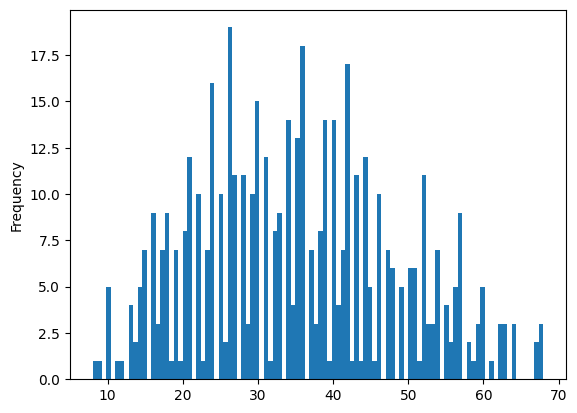

In [10]:
df_fritti_rid['Quantita'].plot(kind='hist', bins=100);

In [11]:
from prophet import Prophet

In [12]:
df_fritti_rid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 495 entries, 522 to 1039
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Calendario  495 non-null    datetime64[ns]
 1   Quantita    495 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 11.6 KB


In [13]:
df_fritti.head()

,Calendario,Quantita
521,2021-05-08,1.0
522,2021-05-25,41.0
523,2021-05-26,59.0
524,2021-05-27,47.0
525,2021-05-28,60.0


In [14]:
df_fritti_rid.head()

,Calendario,Quantita
522,2021-05-25,41.0
523,2021-05-26,59.0
524,2021-05-27,47.0
525,2021-05-28,60.0
527,2021-05-30,48.0


In [15]:
df_fritti_rid.columns = ['ds','y']

In [16]:
df_fritti_rid = df_fritti_rid.reset_index()

In [17]:
df_fritti_rid = df_fritti_rid.drop('index',axis=1)
df_fritti_rid.head()

,ds,y
0,2021-05-25,41.0
1,2021-05-26,59.0
2,2021-05-27,47.0
3,2021-05-28,60.0
4,2021-05-30,48.0


In [18]:
m = Prophet(daily_seasonality  = False,
            weekly_seasonality = True,
            yearly_seasonality = False,
            seasonality_mode   ='additive',
            interval_width=0.95,
            )
#model.add_regressor('summer_temp',standardize=False, mode='additive')
model = m.fit(df_fritti_rid)


17:24:02 - cmdstanpy - INFO - Chain [1] start processing
17:24:02 - cmdstanpy - INFO - Chain [1] done processing


In [19]:
future = model.make_future_dataframe(periods=60) #di default Prophet usa freq='D', cioè usa i giorni come frequenza
future.tail()

,ds
550,2023-01-17
551,2023-01-18
552,2023-01-19
553,2023-01-20
554,2023-01-21


In [20]:
forecast = model.predict(future)
forecast.tail(60)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
495,2022-11-23,37.228709,13.549329,58.026571,37.228709,37.228920,0.206428,0.206428,0.206428,0.206428,0.206428,0.206428,0.0,0.0,0.0,37.435137
496,2022-11-24,37.247537,15.504274,55.995858,37.246929,37.248927,-3.640475,-3.640475,-3.640475,-3.640475,-3.640475,-3.640475,0.0,0.0,0.0,33.607062
497,2022-11-25,37.266365,24.906610,69.306916,37.264854,37.269387,9.152291,9.152291,9.152291,9.152291,9.152291,9.152291,0.0,0.0,0.0,46.418656
498,2022-11-26,37.285193,25.853690,68.801926,37.281795,37.290798,9.482353,9.482353,9.482353,9.482353,9.482353,9.482353,0.0,0.0,0.0,46.767546
499,2022-11-27,37.304022,17.414586,60.358729,37.298126,37.312382,1.364463,1.364463,1.364463,1.364463,1.364463,1.364463,0.0,0.0,0.0,38.668485
500,2022-11-28,37.322850,6.191558,49.782607,37.314513,37.335870,-10.214530,-10.214530,-10.214530,-10.214530,-10.214530,-10.214530,0.0,0.0,0.0,27.108320
501,2022-11-29,37.341678,9.864248,52.180800,37.329943,37.358607,-6.350530,-6.350530,-6.350530,-6.350530,-6.350530,-6.350530,0.0,0.0,0.0,30.991148
502,2022-11-30,37.360506,16.244245,57.600543,37.346151,37.382645,0.206428,0.206428,0.206428,0.206428,0.206428,0.206428,0.0,0.0,0.0,37.566934
503,2022-12-01,37.379334,12.723019,55.520414,37.362296,37.406637,-3.640475,-3.640475,-3.640475,-3.640475,-3.640475,-3.640475,0.0,0.0,0.0,33.738859
504,2022-12-02,37.398163,25.301365,67.677901,37.374939,37.430746,9.152291,9.152291,9.152291,9.152291,9.152291,9.152291,0.0,0.0,0.0,46.550454


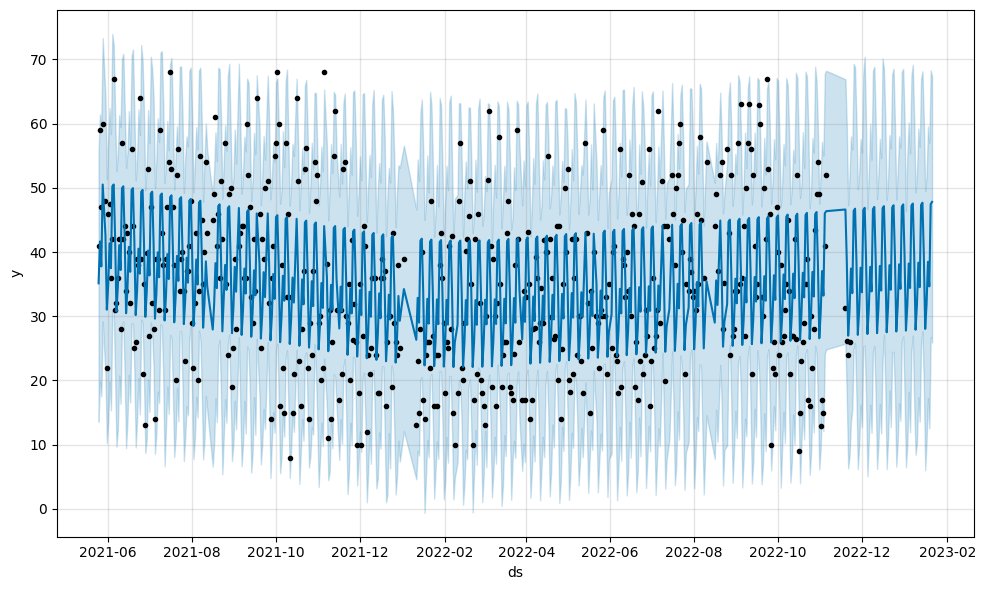

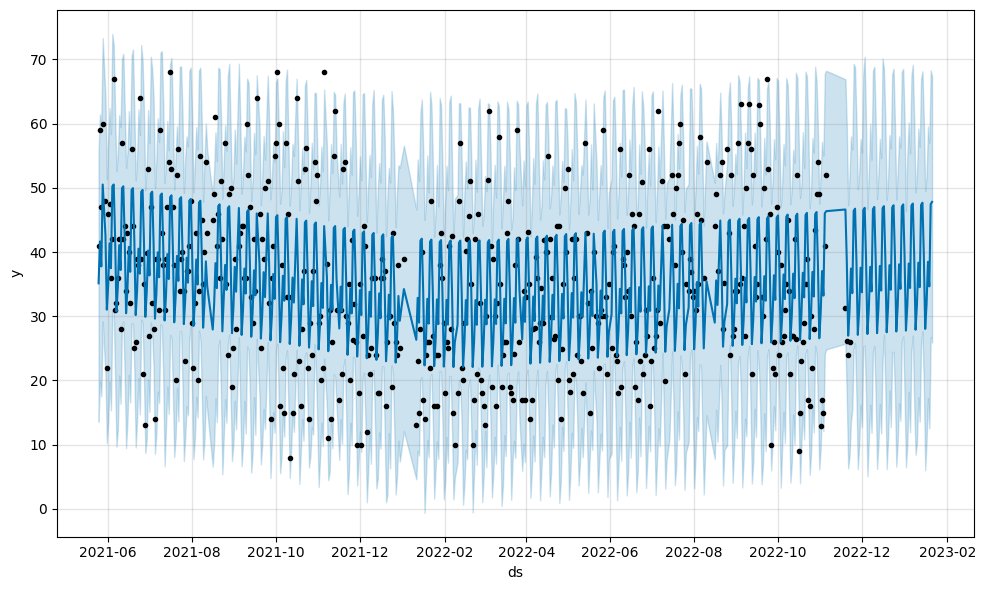

In [21]:
model.plot(forecast)

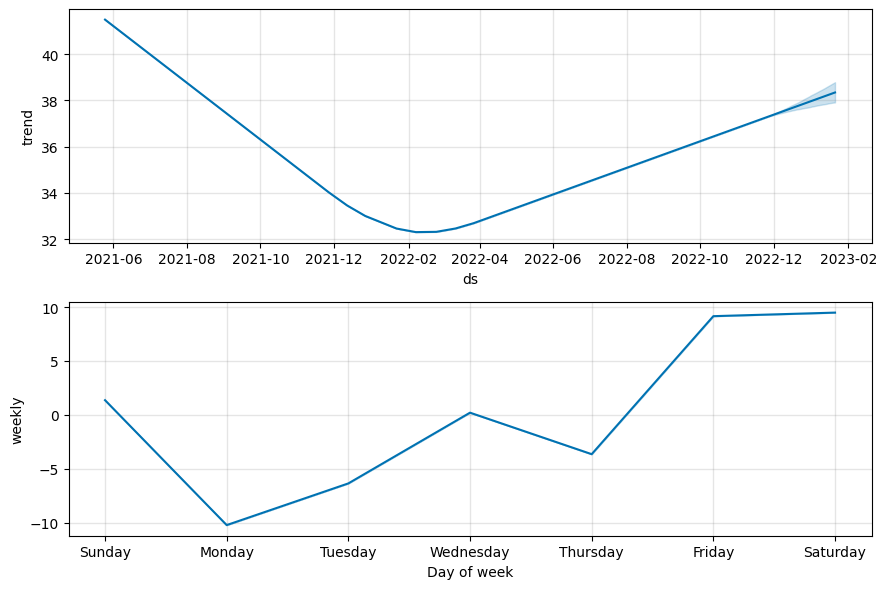

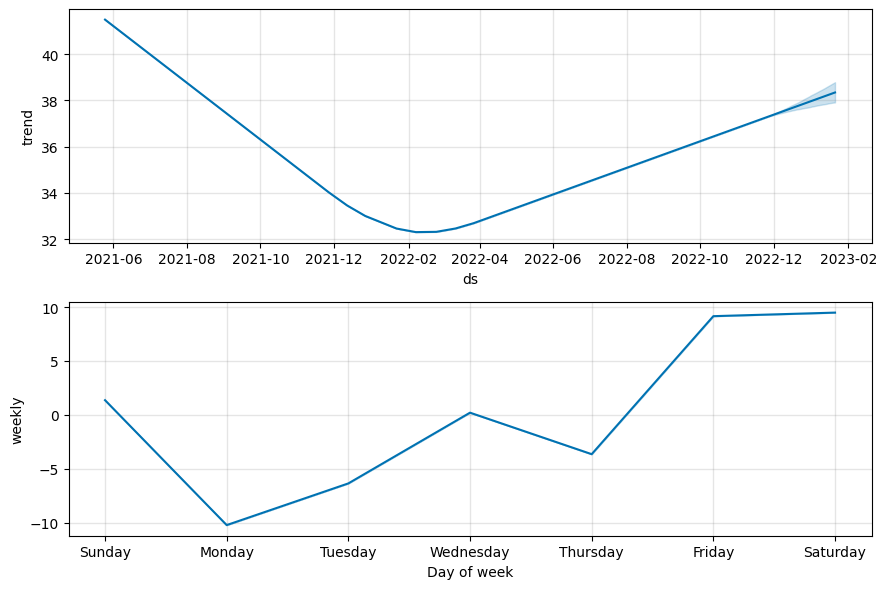

In [22]:
model.plot_components(forecast)

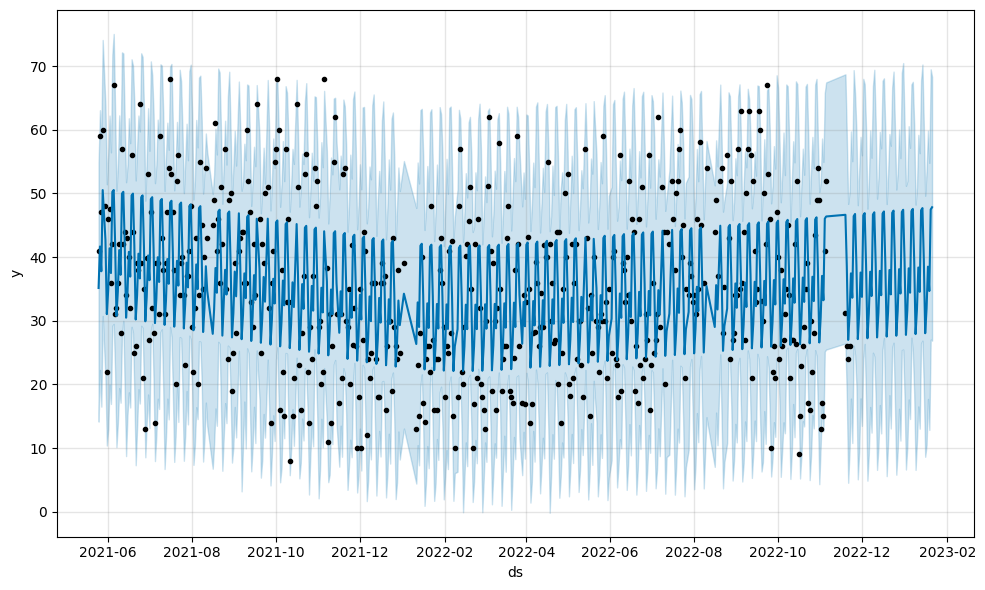

In [23]:
future = model.make_future_dataframe(60) #prevede un certo numero di freq in avanti, ad esempio 2 con freq='W' prevede 2 settimane nel futuro
forecast = model.predict(future)
fig = model.plot(forecast)

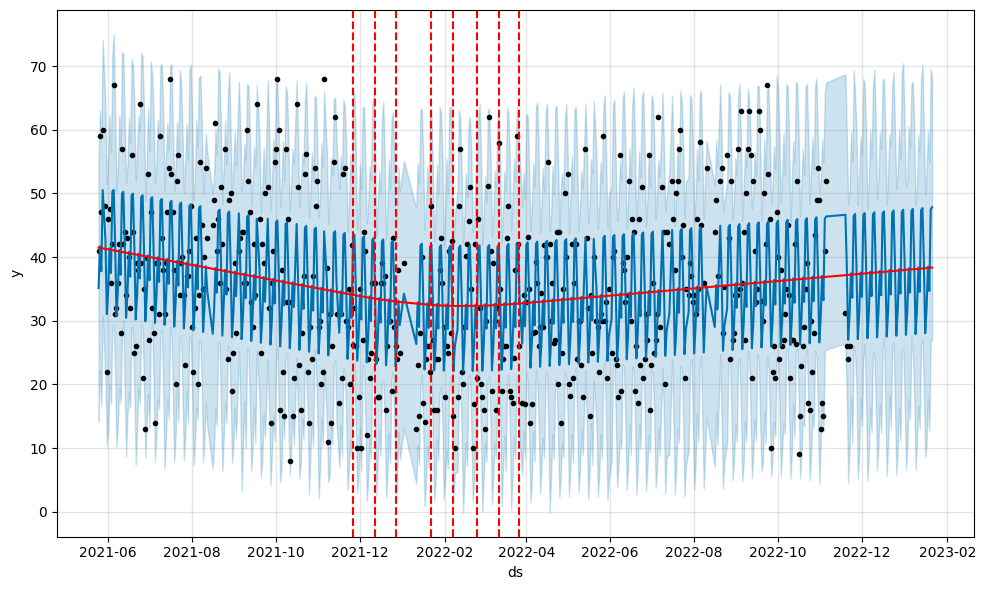

In [24]:
from prophet.plot import add_changepoints_to_plot
fig = model.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), model, forecast)

#Change to Multiplicative

17:24:14 - cmdstanpy - INFO - Chain [1] start processing
17:24:15 - cmdstanpy - INFO - Chain [1] done processing


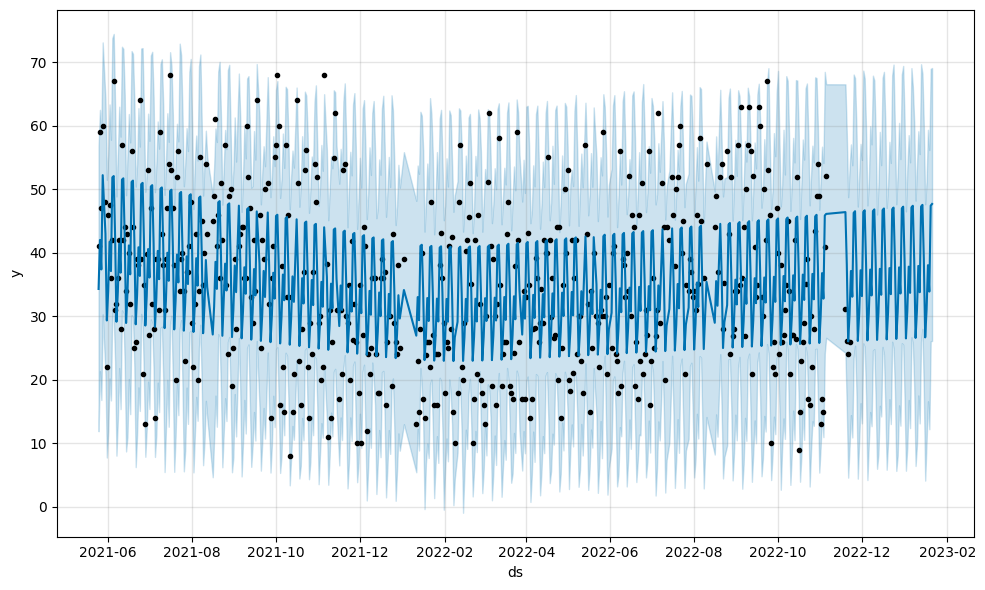

In [25]:
m = Prophet(daily_seasonality  = False,
            weekly_seasonality = True,
            yearly_seasonality = False,
            seasonality_mode = 'multiplicative',
            interval_width=0.95,
            )
model = m.fit(df_fritti_rid)
forecast = model.predict(future)
fig = model.plot(forecast)

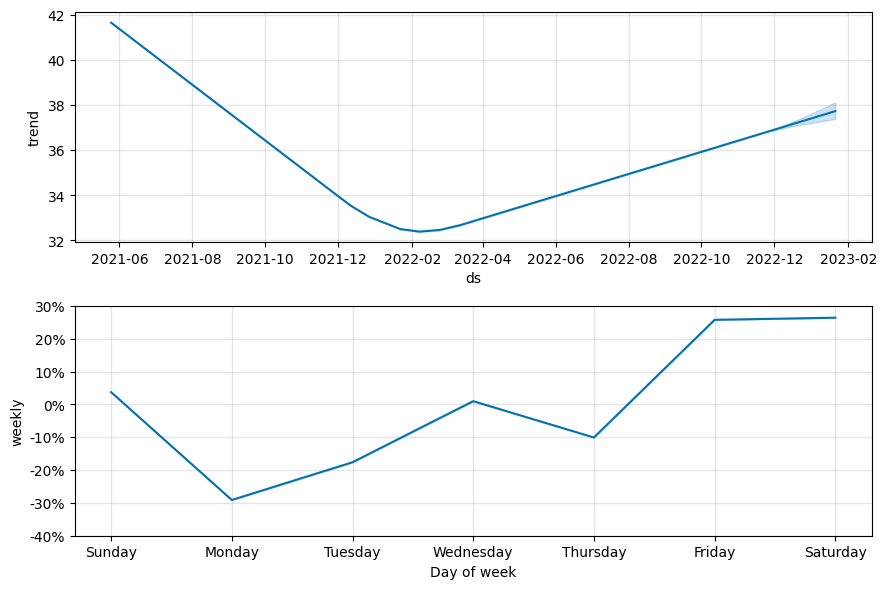

In [26]:
fig = model.plot_components(forecast)

In [27]:
from prophet.diagnostics import cross_validation,performance_metrics
from prophet.plot import plot_cross_validation_metric

In [28]:
model.seasonalities

OrderedDict([('weekly',
              {'period': 7,
               'fourier_order': 3,
               'prior_scale': 10.0,
               'mode': 'multiplicative',
               'condition_name': None})])

In [29]:
model.component_modes

{'additive': ['additive_terms', 'extra_regressors_additive'],
 'multiplicative': ['weekly',
  'multiplicative_terms',
  'extra_regressors_multiplicative',
  'holidays']}

In [30]:
df_fritti_rid.shape

(495, 2)

In [31]:
df_cv = cross_validation(model,
                        horizon='60 days',
                        period='10 days',
                        initial='450 days',
                        )

  0%|          | 0/4 [00:00<?, ?it/s]

17:24:20 - cmdstanpy - INFO - Chain [1] start processing
17:24:20 - cmdstanpy - INFO - Chain [1] done processing
17:24:22 - cmdstanpy - INFO - Chain [1] start processing
17:24:22 - cmdstanpy - INFO - Chain [1] done processing
17:24:23 - cmdstanpy - INFO - Chain [1] start processing
17:24:23 - cmdstanpy - INFO - Chain [1] done processing
17:24:25 - cmdstanpy - INFO - Chain [1] start processing
17:24:25 - cmdstanpy - INFO - Chain [1] done processing


In [32]:
df_cv

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2022-08-25,33.930569,15.034880,53.721571,55.98,2022-08-24
1,2022-08-26,48.269121,27.983093,69.876639,43.00,2022-08-24
2,2022-08-27,48.057182,25.732506,69.239410,24.00,2022-08-24
3,2022-08-28,39.148216,18.793956,58.806820,52.00,2022-08-24
4,2022-08-29,27.115800,7.618838,48.201104,26.98,2022-08-24
...,...,...,...,...,...,...
215,2022-11-05,54.484972,34.492613,74.824009,52.01,2022-09-23
216,2022-11-19,55.437311,33.939507,75.911279,31.22,2022-09-23
217,2022-11-20,47.017555,25.825307,67.278649,26.08,2022-09-23
218,2022-11-21,31.632260,11.814978,52.047914,24.00,2022-09-23


In [33]:
df_performance=performance_metrics(df_cv)
df_performance

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,6 days,177.797341,13.334067,11.409161,0.392277,0.262584,0.316297,0.909091
1,7 days,165.878951,12.879400,11.300320,0.393116,0.244195,0.312527,0.954545
2,8 days,153.317249,12.382134,10.864648,0.331608,0.244195,0.281935,0.977273
3,9 days,131.716777,11.476793,9.873385,0.277250,0.191153,0.249635,1.000000
4,10 days,137.503520,11.726190,10.145467,0.268933,0.222465,0.250473,1.000000
5,11 days,138.978652,11.788921,9.869877,0.248276,0.199049,0.237653,0.954545
6,12 days,139.705842,11.819723,9.783772,0.249894,0.234175,0.239052,0.954545
7,13 days,155.836769,12.483460,10.611635,0.344340,0.256206,0.288844,0.954545
8,14 days,173.472626,13.170901,11.565384,0.378174,0.286177,0.314496,0.954545
9,15 days,185.261295,13.611073,12.073479,0.384419,0.321992,0.322933,0.909091


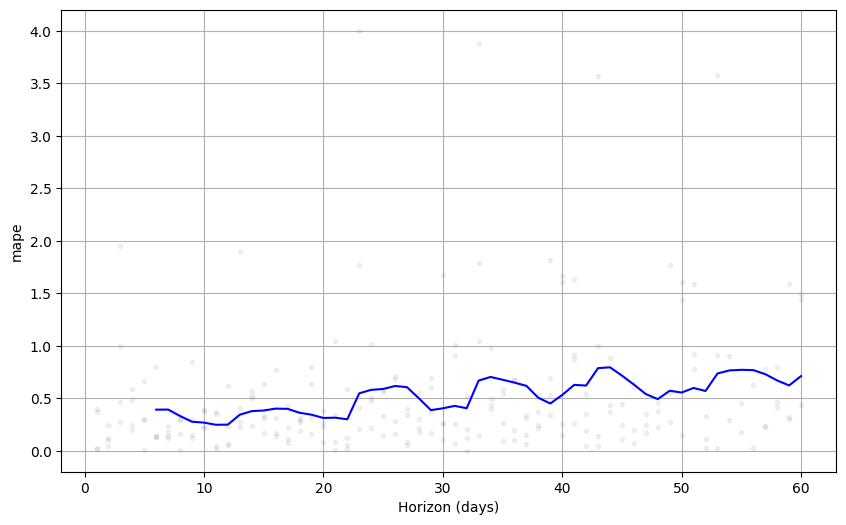

In [34]:
from prophet.plot import plot_cross_validation_metric
fig=plot_cross_validation_metric(df_cv,metric='mape')

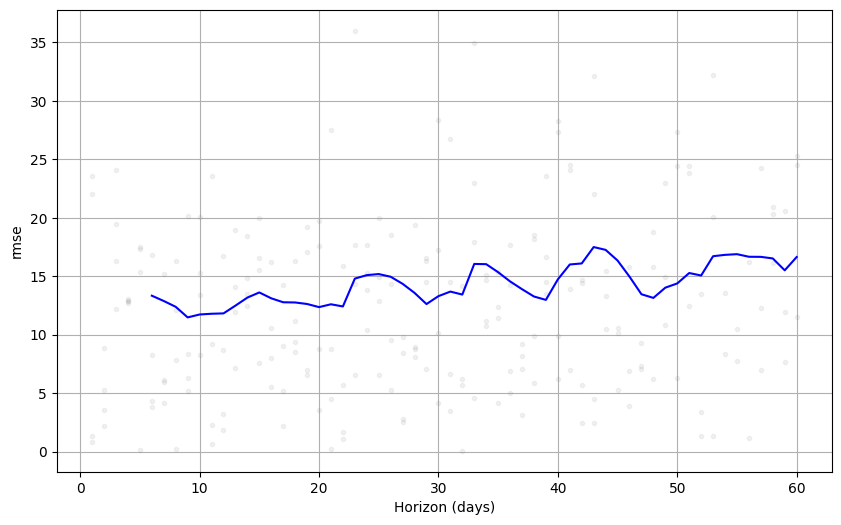

In [35]:
fig=plot_cross_validation_metric(df_cv,metric='rmse')

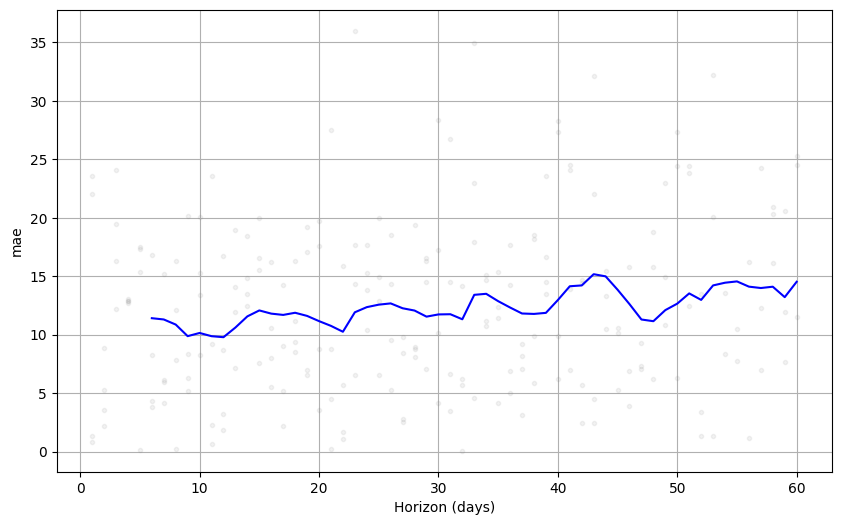

In [36]:
fig=plot_cross_validation_metric(df_cv,metric='mae')

In [91]:
# p1=0.01
# p2=1.0
# param_grid = {  
#      'changepoint_prior_scale': [p1],
#      'seasonality_prior_scale': [p2],
# }
# all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
# model = Prophet(**all_params[0]).fit(df_fritti)  # Fit model with given params
# df_cv = cross_validation(model, 
#                          horizon="30 days",
#                          period='1 days', #shift - moving windows
#                          initial='500 days', 
#                          )
# df_p = performance_metrics(df_cv, rolling_window=1)
# print('Il mape con i valori iniziali messi è', df_p['mape'].values[0])




import itertools
x1=list(np.arange(0.01,0.11,0.01))
x2=list(np.arange(0.050,0.060,0.001))
param_grid = {  
     'changepoint_prior_scale': [0.008,0.009,0.010,0.011,0.012],
     'seasonality_prior_scale': [3,4,5,6,7],
     # 'changepoint_prior_scale': [0.0142,0.0137,0.0141,0.0143,0.0144,0.0145,0.0146],
      #'seasonality_prior_scale': [0.051],
    #'changepoint_prior_scale': x1,#[0.013],
    #'seasonality_prior_scale': x2,#[0.045],
}

# Generate all combinations of parameters
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
mapes = []  # Store the RMSEs for each params here


# Use cross validation to evaluate all parameters
for params in all_params:
    model = Prophet(**params).fit(df_fritti_rid)  # Fit model with given params
    df_cv = cross_validation(model, 
                             horizon="60 days",
                             period='10 days', #shift - moving windows
                             initial='450 days', 
                             )
    
    df_p = performance_metrics(df_cv, rolling_window=1)
    # rmses.append(df_p['rmse'].values[0])
    mapes.append(df_p['mape'].values[0])

# Find the best parameters
tuning_results = pd.DataFrame(all_params)
#tuning_results['rmse'] = rmses
tuning_results['mape'] = mapes
print(tuning_results);

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\ALESSA~1\\AppData\\Local\\Temp\\tmp1iunt5vx\\q0gdu38t.json'

In [74]:
#mape con changepoint_prior_scale e seasonality_prior_scale: 21.96 con 0.004 e 1.5, 21.91 con 0.0042 e 1.52, 21.83 con 0.00416 e 1.52
#21.81 con 0.004164 e 1.54, 21.80 con 0.004164 e 1.541, 21.79 con 0.0041645 e 1.5406, 21.26 con 0.01 e 0.02, 21.13 con 0.0109 e 0.018
#21.11 con 0.01089 e 0.018, 21.105 con 0.010891 e 0.01802

#con df_fritti_rid: 0.18.. con 0.01 e 0.1, 0.17.. con 0.014 e 0.05, 0.1703 con 0.0136 e 0.052, 0.1702 con 0.0133 e 0.051
#con df_fritti_rid, initial=450, period=10 e horizon=60: 0.1691 con 0.0137 e 0.051
best_params = all_params[np.argmin(mapes)]
print(best_params, tuning_results['mape'][np.argmin(mapes)])

{'changepoint_prior_scale': 0.01, 'seasonality_prior_scale': 5} 0.3517150980113071


In [75]:
model_tuned = Prophet(changepoint_prior_scale=0.01,
                      seasonality_prior_scale=5,
                      seasonality_mode = 'additive',
                      interval_width = 0.95,
                      daily_seasonality  = False,
                      weekly_seasonality = True,
                      yearly_seasonality = False,
                     )
model_tuned

In [76]:
model_tuned.fit(df_fritti_rid)

19:07:28 - cmdstanpy - INFO - Chain [1] start processing
19:07:28 - cmdstanpy - INFO - Chain [1] done processing


In [77]:
df_cv_final=cross_validation(model_tuned,
                            horizon="60 days",
                            period='10 days',
                            initial='450 days',
                            )

  0%|          | 0/4 [00:00<?, ?it/s]

19:07:31 - cmdstanpy - INFO - Chain [1] start processing
19:07:32 - cmdstanpy - INFO - Chain [1] done processing
19:07:32 - cmdstanpy - INFO - Chain [1] start processing
19:07:32 - cmdstanpy - INFO - Chain [1] done processing
19:07:33 - cmdstanpy - INFO - Chain [1] start processing
19:07:33 - cmdstanpy - INFO - Chain [1] done processing
19:07:33 - cmdstanpy - INFO - Chain [1] start processing
19:07:33 - cmdstanpy - INFO - Chain [1] done processing


In [78]:
df_performance=performance_metrics(df_cv_final)
df_performance

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,6 days,206.921822,14.384777,12.380762,0.357098,0.304520,0.351915,0.909091
1,7 days,181.793611,13.483086,11.340973,0.334128,0.286949,0.321943,0.909091
2,8 days,190.899118,13.816625,11.541797,0.298984,0.297659,0.307475,0.863636
3,9 days,175.508817,13.247974,10.892770,0.258729,0.281371,0.280474,0.863636
4,10 days,196.841235,14.030012,11.531046,0.263643,0.285415,0.293472,0.795455
5,11 days,209.565381,14.476373,11.594503,0.249657,0.231447,0.283567,0.772727
6,12 days,206.952723,14.385851,11.829394,0.261655,0.278870,0.298062,0.795455
7,13 days,202.813705,14.241268,11.861186,0.316419,0.278870,0.327084,0.840909
8,14 days,201.255374,14.186450,11.802976,0.318862,0.258243,0.325452,0.818182
9,15 days,214.226743,14.636487,11.985944,0.319237,0.258243,0.328401,0.772727


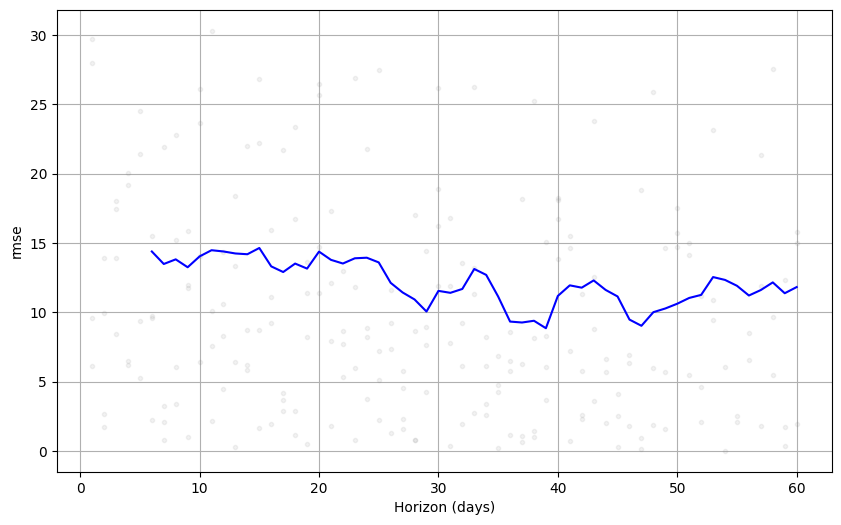

In [79]:
fig=plot_cross_validation_metric(df_cv_final,metric='rmse')

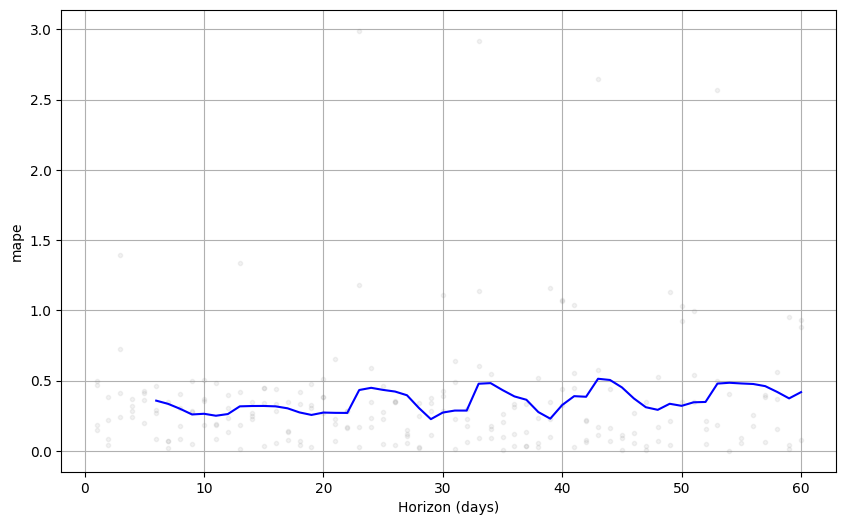

In [80]:
fig=plot_cross_validation_metric(df_cv_final,metric='mape')

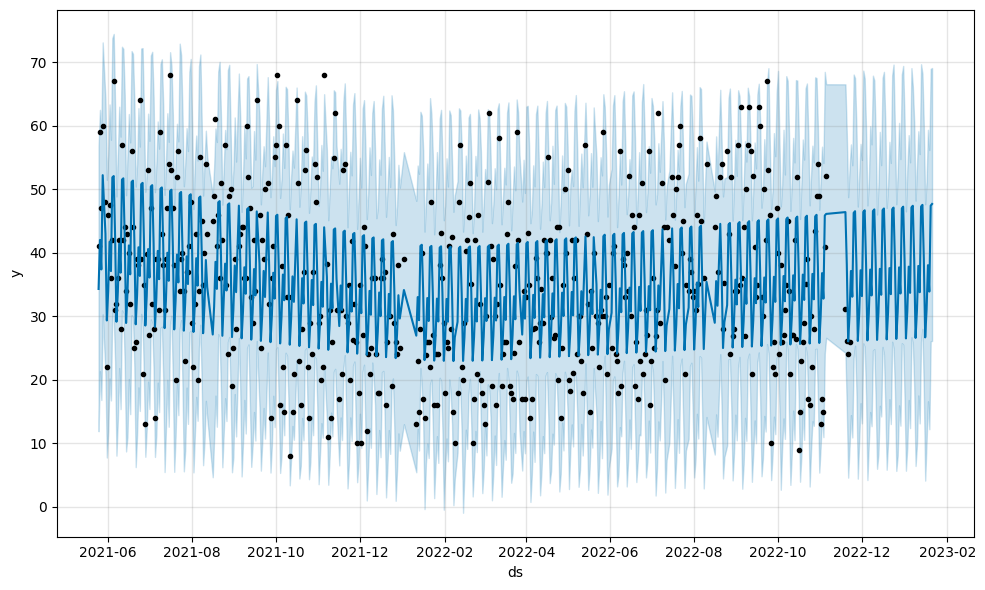

In [81]:
plot1 = model_tuned.plot(forecast)

In [82]:
from prophet.plot import plot_plotly
from datetime import datetime

fig = plot_plotly(model_tuned, forecast)
fig.update_layout( 
                  yaxis_title="Birre vendute",
                  xaxis_title="Data",
                  title="Vendita birre",
                  )
fig

In [83]:
print(f"mape: {df_performance['mape'].mean()}\nmae:{df_performance['mae'].mean()}\nrmse:{df_performance['rmse'].mean()}")

mape: 0.3558429684595279
mae:9.707564168209974
rmse:12.116353325386664


In [84]:
from prophet.plot import plot_components_plotly
plot_components_plotly(model_tuned,forecast)

In [85]:
# Save model
import joblib

joblib.dump(model_tuned,'model_fritti.pkl')

['model_fritti.pkl']

In [66]:
# model_load = joblib.load('model_XGB.pkl')
# future_w_features['pred'] = model_load.predict(future_w_features[FEATURES])
# future_w_features['pred'].plot(figsize=(10, 5),
#                                color='purple',
#                                ms=1, 
#                                lw=1,
#                                title='Future Predictions');

<AxesSubplot: xlabel='y(t)', ylabel='y(t + 7)'>

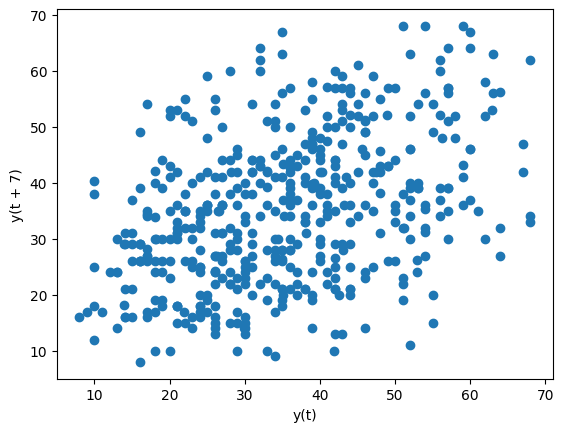

In [89]:
from pandas.plotting import lag_plot
lag_plot(df_fritti_rid['y'],7)

<AxesSubplot: xlabel='y(t)', ylabel='y(t + 7)'>

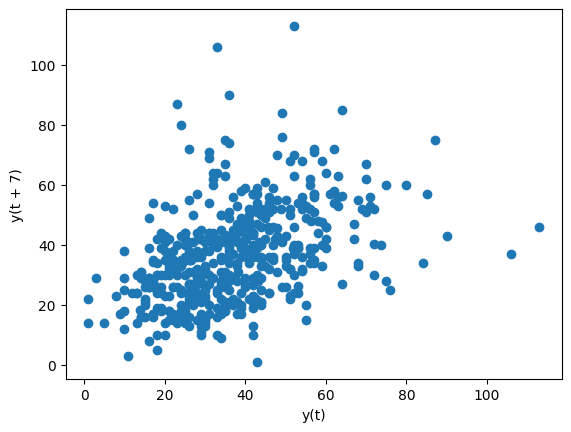

In [87]:
from pandas.plotting import lag_plot
lag_plot(df_fritti['Quantita'],7)